<a href="https://colab.research.google.com/github/suzanchristoff/projeto2hipoteses/blob/main/projeto_risco_relativo_suzan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação bibliotecas, leitura do dataframe e renomeação colunas**

In [1]:
# Importação bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.ticker as ticker

In [2]:
#Leitura do dataframe
caminho_arquivo="/content/tb_final_dados_integrados_bigquery_projeto3.csv"
df=pd.read_csv(caminho_arquivo)

In [3]:
df.head()

,user_id,default_flag,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,age,sex,last_month_salary,number_dependents,total_real_estate,total_other,total_loans
0,17,0,0,0.142582,0,0.082849,0,79,M,10500.0,0.0,0,22,22
1,180,0,0,0.067297,1,0.153106,1,66,M,8000.0,0.0,0,25,25
2,353,0,0,0.118795,0,1.383004,0,59,F,4200.0,0.0,5,19,24
3,404,0,0,0.058924,0,0.639308,0,56,F,6700.0,1.0,2,29,31
4,405,0,0,0.173502,0,12403.000000,0,69,M,NaN,0.0,9,22,31


In [4]:
#COLUNAS ATUAIS
df.columns

Index(['user_id', 'default_flag', 'more_90_days_overdue',
       'using_lines_not_secured_personal_assets',
       'number_times_delayed_payment_loan_30_59_days', 'debt_ratio',
       'number_times_delayed_payment_loan_60_89_days', 'age', 'sex',
       'last_month_salary', 'number_dependents', 'total_real_estate',
       'total_other', 'total_loans'],
      dtype='object')

In [5]:
#RENOMEANDO COLUNAS
df=df.rename(columns={'user_id':'id_usuario',
                    'default_flag': 'indicador_inadimplencia',
                      'more_90_days_overdue': 'mais_90_dias_atraso',
                      'number_times_delayed_payment_loan_30_59_days': 'numero_vezes_atraso_emprestimo_30_59_dias',
                      'using_lines_not_secured_personal_assets': 'quanto_esta_usando_em_relação_ao_limite_de_crédito',
                      'debt_ratio':'relacao_dividas_ativos',
                      'number_times_delayed_payment_loan_60_89_days': 'numero_vezes_atraso_emprestimo_60_89_dias',
                      'age': 'idade',
                      'sex': 'sexo',
                      'last_month_salary': 'salario_ultimo_mes',
                      'number_dependents': 'numero_dependentes',
                      'total_real_estate': 'total_imovel',
                      'total_other': 'total_outros',
                      'total_loans': 'total_emprestimos'})

In [6]:
#NOMES NOVAS COLUNAS
df.columns

Index(['id_usuario', 'indicador_inadimplencia', 'mais_90_dias_atraso',
       'quanto_esta_usando_em_relação_ao_limite_de_crédito',
       'numero_vezes_atraso_emprestimo_30_59_dias', 'relacao_dividas_ativos',
       'numero_vezes_atraso_emprestimo_60_89_dias', 'idade', 'sexo',
       'salario_ultimo_mes', 'numero_dependentes', 'total_imovel',
       'total_outros', 'total_emprestimos'],
      dtype='object')

# **Identificação dos nulos**
Identificados 7.199 nulos referente à variável "salário último mês" e 943 nulos referente à variável "número de dependentes"

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id_usuario                                          36000 non-null  int64  
 1   indicador_inadimplencia                             36000 non-null  int64  
 2   mais_90_dias_atraso                                 36000 non-null  int64  
 3   quanto_esta_usando_em_relação_ao_limite_de_crédito  36000 non-null  float64
 4   numero_vezes_atraso_emprestimo_30_59_dias           36000 non-null  int64  
 5   relacao_dividas_ativos                              36000 non-null  float64
 6   numero_vezes_atraso_emprestimo_60_89_dias           36000 non-null  int64  
 7   idade                                               36000 non-null  int64  
 8   sexo                                                36000 non-null  object 


# **Cálculo correlação entre as variáveis relacionadas ao atraso no pagamento (possibilidade de estarem altamente correlacionadas)**
*   Por estarem altamente correlacionadas, optou-se por manter apenas a variável 'mais_90_dias_atraso', que será necessária para validação ou refutação de uma das hipóteses.




In [8]:
#CORRELAÇÃO PEARSON
corr_1 = df['numero_vezes_atraso_emprestimo_30_59_dias'].corr(df['numero_vezes_atraso_emprestimo_60_89_dias'])
print(f'A correlação entre o número de atrasos de 30-59 dias e 60-89 dias é: {corr_1}')
corr_2 = df['numero_vezes_atraso_emprestimo_30_59_dias'].corr(df['mais_90_dias_atraso'])
print(f'A correlação entre o número de atrasos de 30-59 dias e mais de 90 dias é: {corr_2}')
corr_3 = df['numero_vezes_atraso_emprestimo_30_59_dias'].corr(df['indicador_inadimplencia'])
print(f'A correlação entre o número de atrasos de 30-59 dias e o indicador de inadimplência é: {corr_3}')


A correlação entre o número de atrasos de 30-59 dias e 60-89 dias é: 0.9865536454986691
A correlação entre o número de atrasos de 30-59 dias e mais de 90 dias é: 0.9829168066145929
A correlação entre o número de atrasos de 30-59 dias e o indicador de inadimplência é: 0.2992078811236374


<Axes: xlabel='numero_vezes_atraso_emprestimo_30_59_dias', ylabel='numero_vezes_atraso_emprestimo_60_89_dias'>

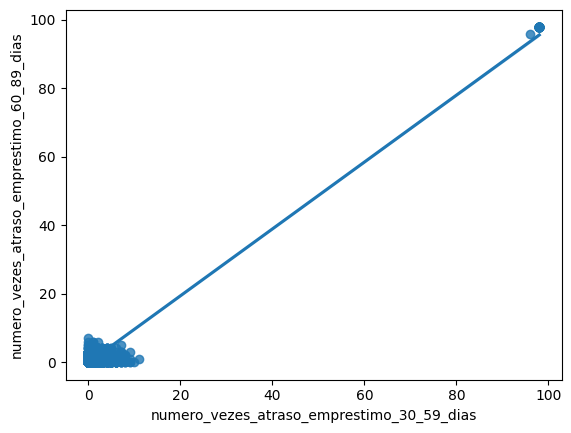

In [9]:
sns.regplot( x='numero_vezes_atraso_emprestimo_30_59_dias',y='numero_vezes_atraso_emprestimo_60_89_dias', data=df)

In [10]:
#DESVIO PADRÃO
df[['numero_vezes_atraso_emprestimo_30_59_dias','numero_vezes_atraso_emprestimo_60_89_dias','mais_90_dias_atraso']].std()

numero_vezes_atraso_emprestimo_30_59_dias    4.144020
numero_vezes_atraso_emprestimo_60_89_dias    4.105515
mais_90_dias_atraso                          4.121365
dtype: float64

# **Clientes com flag de inadimplência antes exclusão dos outliers**

In [11]:
df.groupby('indicador_inadimplencia')['id_usuario'].count()

indicador_inadimplencia
0    35317
1      683
Name: id_usuario, dtype: int64

# **Análise e exclusão dos outliers**
Optei por desconsiderar os outliers extremos em relação as variáveis 'número de vezes que atrasou o pagamento' , 'relacão dividas ativos' e 'uso do limite de crédito'

In [12]:
df[(df['mais_90_dias_atraso'] >= 96)].count()

id_usuario                                            63
indicador_inadimplencia                               63
mais_90_dias_atraso                                   63
quanto_esta_usando_em_relação_ao_limite_de_crédito    63
numero_vezes_atraso_emprestimo_30_59_dias             63
relacao_dividas_ativos                                63
numero_vezes_atraso_emprestimo_60_89_dias             63
idade                                                 63
sexo                                                  63
salario_ultimo_mes                                    31
numero_dependentes                                    56
total_imovel                                          63
total_outros                                          63
total_emprestimos                                     63
dtype: int64

In [13]:
df[(df['quanto_esta_usando_em_relação_ao_limite_de_crédito'] >= 10000)].count()

id_usuario                                            4
indicador_inadimplencia                               4
mais_90_dias_atraso                                   4
quanto_esta_usando_em_relação_ao_limite_de_crédito    4
numero_vezes_atraso_emprestimo_30_59_dias             4
relacao_dividas_ativos                                4
numero_vezes_atraso_emprestimo_60_89_dias             4
idade                                                 4
sexo                                                  4
salario_ultimo_mes                                    3
numero_dependentes                                    4
total_imovel                                          4
total_outros                                          4
total_emprestimos                                     4
dtype: int64

In [14]:
df[(df['relacao_dividas_ativos'] >= 307000)].count()

id_usuario                                            1
indicador_inadimplencia                               1
mais_90_dias_atraso                                   1
quanto_esta_usando_em_relação_ao_limite_de_crédito    1
numero_vezes_atraso_emprestimo_30_59_dias             1
relacao_dividas_ativos                                1
numero_vezes_atraso_emprestimo_60_89_dias             1
idade                                                 1
sexo                                                  1
salario_ultimo_mes                                    0
numero_dependentes                                    1
total_imovel                                          1
total_outros                                          1
total_emprestimos                                     1
dtype: int64

In [15]:
df[(df['mais_90_dias_atraso'] >=80) | (df['relacao_dividas_ativos']>=307000.00) | (df['quanto_esta_usando_em_relação_ao_limite_de_crédito']>=10000)]

,id_usuario,indicador_inadimplencia,mais_90_dias_atraso,quanto_esta_usando_em_relação_ao_limite_de_crédito,numero_vezes_atraso_emprestimo_30_59_dias,relacao_dividas_ativos,numero_vezes_atraso_emprestimo_60_89_dias,idade,sexo,salario_ultimo_mes,numero_dependentes,total_imovel,total_outros,total_emprestimos
790,865,0,98,1.00000,98,0.000000,98,21,M,867.0,0.0,0,0,0
807,3108,0,98,1.00000,98,0.000000,98,21,M,NaN,0.0,0,0,0
906,12771,0,98,1.00000,98,0.000000,98,22,M,NaN,NaN,0,0,0
954,17431,0,98,1.00000,98,0.000000,98,22,M,NaN,0.0,0,0,0
987,20824,0,98,1.00000,98,0.000000,98,22,F,4500.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,3680,0,0,13930.00000,0,4902.000000,0,45,M,NaN,0.0,2,2,4
9326,6579,0,0,18300.00000,0,0.221582,0,45,F,12500.0,2.0,1,4,5
10048,15531,0,0,12369.00000,2,0.134352,0,40,M,30300.0,0.0,1,4,5
16054,10876,0,0,22000.00000,0,1.080020,0,38,F,3973.0,3.0,2,5,7


In [16]:
df[(df['mais_90_dias_atraso'] <= 80) & (df['relacao_dividas_ativos']<307000.00) & (df['quanto_esta_usando_em_relação_ao_limite_de_crédito']<10000)]

,id_usuario,indicador_inadimplencia,mais_90_dias_atraso,quanto_esta_usando_em_relação_ao_limite_de_crédito,numero_vezes_atraso_emprestimo_30_59_dias,relacao_dividas_ativos,numero_vezes_atraso_emprestimo_60_89_dias,idade,sexo,salario_ultimo_mes,numero_dependentes,total_imovel,total_outros,total_emprestimos
0,17,0,0,0.142582,0,0.082849,0,79,M,10500.0,0.0,0,22,22
1,180,0,0,0.067297,1,0.153106,1,66,M,8000.0,0.0,0,25,25
2,353,0,0,0.118795,0,1.383004,0,59,F,4200.0,0.0,5,19,24
3,404,0,0,0.058924,0,0.639308,0,56,F,6700.0,1.0,2,29,31
4,405,0,0,0.173502,0,12403.000000,0,69,M,NaN,0.0,9,22,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,35581,0,0,0.490135,1,0.521878,0,37,F,12500.0,1.0,4,17,21
35996,35795,0,0,0.009620,2,1981.000000,0,63,M,NaN,2.0,0,21,21
35997,35972,0,0,0.005944,0,0.151164,0,64,M,9750.0,1.0,2,19,21
35998,12012,1,4,0.391521,1,3.578655,1,51,M,3419.0,2.0,6,15,21


In [17]:
df=df[(df['mais_90_dias_atraso'] <= 80) & (df['relacao_dividas_ativos']<307000.00)& (df['quanto_esta_usando_em_relação_ao_limite_de_crédito']<10000)]
df.count()

id_usuario                                            35932
indicador_inadimplencia                               35932
mais_90_dias_atraso                                   35932
quanto_esta_usando_em_relação_ao_limite_de_crédito    35932
numero_vezes_atraso_emprestimo_30_59_dias             35932
relacao_dividas_ativos                                35932
numero_vezes_atraso_emprestimo_60_89_dias             35932
idade                                                 35932
sexo                                                  35932
salario_ultimo_mes                                    28767
numero_dependentes                                    34996
total_imovel                                          35932
total_outros                                          35932
total_emprestimos                                     35932
dtype: int64

# **Seleção variáveis dentro do escopo**

In [18]:
#SELECIONANDO APENAS AS VARIÁVEIS DENTRO DO ESCOPO
df=df[['id_usuario', 'indicador_inadimplencia',
       'quanto_esta_usando_em_relação_ao_limite_de_crédito',
        'relacao_dividas_ativos',
       'mais_90_dias_atraso', 'idade', 'sexo',
       'salario_ultimo_mes', 'numero_dependentes', 'total_imovel',
       'total_outros', 'total_emprestimos']]

# **Tratamento nulos**

In [19]:
#TRATANDO VALORES NULOS VARIÁVEIS SALÁRIOS E NUMERO DEPENDENTES
mediana_salarios=df['salario_ultimo_mes'].median()
mediana_n_dependentes=df['numero_dependentes'].median()
df['salario_ultimo_mes'].fillna(mediana_salarios, inplace=True)
df['numero_dependentes'].fillna(mediana_n_dependentes, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35932 entries, 0 to 35999
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id_usuario                                          35932 non-null  int64  
 1   indicador_inadimplencia                             35932 non-null  int64  
 2   quanto_esta_usando_em_relação_ao_limite_de_crédito  35932 non-null  float64
 3   relacao_dividas_ativos                              35932 non-null  float64
 4   mais_90_dias_atraso                                 35932 non-null  int64  
 5   idade                                               35932 non-null  int64  
 6   sexo                                                35932 non-null  object 
 7   salario_ultimo_mes                                  35932 non-null  float64
 8   numero_dependentes                                  35932 non-null  float64
 9   

# **Criação variáveis dummy_dependentes e dummy_atrasos para análise de correlações**

In [21]:
df['dummy_atraso']=df['mais_90_dias_atraso'].apply(lambda x: 1 if x > 0 else 0)
df['dummy_dependentes']=df['numero_dependentes'].apply(lambda x: 1 if x > 0 else 0)

# **Correlações positivas possíveis**
*   Idade e salário
*   Ter dependentes e salário
*   Salário e taxa de endividamento
*   Taxa endividamento e indicador de inadimplência
*   Uso limite crédito e taxa de endividamento
*   Número de empréstimos e indicador de inadimplência
*   Atrasos e indicador de inadimplência


In [22]:
corr_a=df['idade'].corr(df['salario_ultimo_mes'])
print(f'A correlação entre a idade e o salário é: {corr_a}')
corr_b=df['dummy_dependentes'].corr(df['salario_ultimo_mes'])
print(f'A correlação entre o ter dependentes e ter maior salário é: {corr_b}')
corr_c=df['salario_ultimo_mes'].corr(df['relacao_dividas_ativos'])
print(f'A correlação entre salário e taxa de endividamento é: {corr_c}')
corr_d=(df['relacao_dividas_ativos'].corr(df['indicador_inadimplencia']))
print(f'A correlação entre a taxa de endividamento e o indicador de inadimplência é: {corr_d}')
corr_e=(df['quanto_esta_usando_em_relação_ao_limite_de_crédito'].corr(df['relacao_dividas_ativos']))
print(f'A correlação entre o uso do limite de crédito e a taxa de endividamento é: {corr_e}')
corr_f=df['total_emprestimos'].corr(df['indicador_inadimplencia'])
print(f'A correlação entre o número total de empréstimos e o indicador de inadimplência é: {corr_f}')
corr_g=df['dummy_atraso'].corr(df['indicador_inadimplencia'])
print(f'A correlação entre o número de atrasos e o indicador de inadimplência é: {corr_g}')

A correlação entre a idade e o salário é: 0.025196280785083614
A correlação entre o ter dependentes e ter maior salário é: 0.0816565821541943
A correlação entre salário e taxa de endividamento é: -0.033098221883111574
A correlação entre a taxa de endividamento e o indicador de inadimplência é: -0.00913463437524751
A correlação entre o uso do limite de crédito e a taxa de endividamento é: 0.03488079806117224
A correlação entre o número total de empréstimos e o indicador de inadimplência é: -0.043288244607268635
A correlação entre o número de atrasos e o indicador de inadimplência é: 0.5157773474592263


In [23]:
df['relacao_dividas_ativos'].describe()

count    35932.000000
mean       343.548286
std       1198.502771
min          0.000000
25%          0.177061
50%          0.366492
75%          0.874466
max      60212.000000
Name: relacao_dividas_ativos, dtype: float64

<Axes: xlabel='dummy_atraso', ylabel='indicador_inadimplencia'>

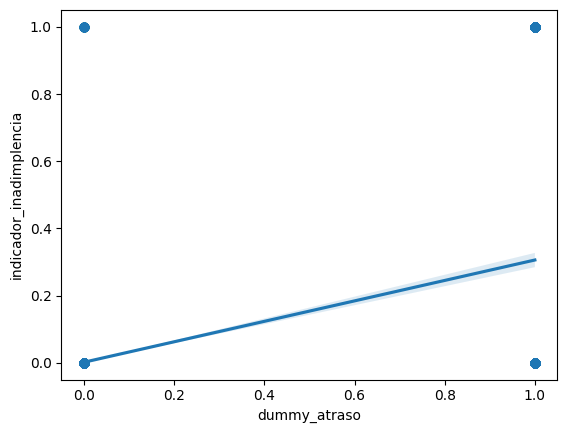

In [137]:
sns.regplot( x='dummy_atraso',y='indicador_inadimplencia', data=df)

# **Correlações negativas possíveis**
*   Idade e indicador de inadimplência
*   Idade e atrasos
*   Salário e atrasos


In [25]:
corr_h=df['idade'].corr(df['indicador_inadimplencia'])
print(f'A correlação entre a idade e o indicador de inadimplência é: {corr_h}')
corr_i=df['idade'].corr(df['dummy_atraso'])
print(f'A correlação entre a idade e o atraso nos pagamentos é: {corr_i}')
corr_j=df['salario_ultimo_mes'].corr(df['dummy_atraso'])
print(f'A correlação entre o salário e o atraso nos pagamentos é: {corr_j}')

A correlação entre a idade e o indicador de inadimplência é: -0.07061200537364948
A correlação entre a idade e o atraso nos pagamentos é: -0.0955404944665207
A correlação entre o salário e o atraso nos pagamentos é: -0.025888252742959417


# **Número clientes com flag inadimplência**

*   Total de 35.932 clientes -  632 clientes com flag de inadimplência
*   Taxa inadimplência geral é de 1,75%







In [26]:
df.groupby('indicador_inadimplencia')['id_usuario'].count()

indicador_inadimplencia
0    35300
1      632
Name: id_usuario, dtype: int64

In [27]:
35300+632

35932

In [28]:
632/35932*100

1.7588778804408327

# **Emprestimos imoveis**

In [29]:
#clientes que têm exclusivamente empréstimos imóveis
df_imoveis=df[(df['total_imovel']>=1) & (df['total_outros']==0)]
df_imoveis.count()

id_usuario                                            90
indicador_inadimplencia                               90
quanto_esta_usando_em_relação_ao_limite_de_crédito    90
relacao_dividas_ativos                                90
mais_90_dias_atraso                                   90
idade                                                 90
sexo                                                  90
salario_ultimo_mes                                    90
numero_dependentes                                    90
total_imovel                                          90
total_outros                                          90
total_emprestimos                                     90
dummy_atraso                                          90
dummy_dependentes                                     90
dtype: int64

# **Outros empréstimos**

In [30]:
#clientes que têm
df_outros=df[(df['total_outros']>=1) & (df['total_imovel']==0)]
df_outros.count()

id_usuario                                            13118
indicador_inadimplencia                               13118
quanto_esta_usando_em_relação_ao_limite_de_crédito    13118
relacao_dividas_ativos                                13118
mais_90_dias_atraso                                   13118
idade                                                 13118
sexo                                                  13118
salario_ultimo_mes                                    13118
numero_dependentes                                    13118
total_imovel                                          13118
total_outros                                          13118
total_emprestimos                                     13118
dummy_atraso                                          13118
dummy_dependentes                                     13118
dtype: int64

# **Total clientes sem empréstimos ativos**
Embora tenham sido identificados 363 clientes sem empréstimos ativos, optou-se por mantê-los, pois eles possuem outros atributos, tais como flag de inadimplência, dívidas e uso do limite de crédito, salário e idade, variáveis essas que podem ser consideradas no risco de concessão de novas linhas de créditos que esses clientes possam vir a contratar



In [31]:
(363/35932)-1

-0.989897584325949

In [32]:
df.count()

id_usuario                                            35932
indicador_inadimplencia                               35932
quanto_esta_usando_em_relação_ao_limite_de_crédito    35932
relacao_dividas_ativos                                35932
mais_90_dias_atraso                                   35932
idade                                                 35932
sexo                                                  35932
salario_ultimo_mes                                    35932
numero_dependentes                                    35932
total_imovel                                          35932
total_outros                                          35932
total_emprestimos                                     35932
dummy_atraso                                          35932
dummy_dependentes                                     35932
dtype: int64

In [33]:
#total clientes sem empréstimos ativos
clientes_sem_emprestimos_ativos=df[df['total_emprestimos']==0]
clientes_sem_emprestimos_ativos

,id_usuario,indicador_inadimplencia,quanto_esta_usando_em_relação_ao_limite_de_crédito,relacao_dividas_ativos,mais_90_dias_atraso,idade,sexo,salario_ultimo_mes,numero_dependentes,total_imovel,total_outros,total_emprestimos,dummy_atraso,dummy_dependentes
776,56,0,1.0,0.00000,0,41,F,5408.0,0.0,0,0,0,0,0
777,59,0,1.0,0.00000,0,57,F,5408.0,0.0,0,0,0,0,0
778,169,0,1.0,0.00000,0,79,M,5408.0,0.0,0,0,0,0,0
779,208,0,1.0,0.00000,0,47,M,5408.0,0.0,0,0,0,0,0
780,252,0,1.0,0.00000,0,23,M,800.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,17717,1,1.0,0.18512,4,30,M,1706.0,3.0,0,0,0,1,1
1174,18593,1,1.0,58.00000,5,30,F,5408.0,0.0,0,0,0,1,0
1177,21016,1,1.0,0.00000,3,31,F,5408.0,0.0,0,0,0,1,0
1178,21056,1,1.0,356.00000,4,49,F,5408.0,2.0,0,0,0,1,1


In [34]:
df[(df['total_emprestimos']==0)&(df['indicador_inadimplencia']==1)].count()

id_usuario                                            11
indicador_inadimplencia                               11
quanto_esta_usando_em_relação_ao_limite_de_crédito    11
relacao_dividas_ativos                                11
mais_90_dias_atraso                                   11
idade                                                 11
sexo                                                  11
salario_ultimo_mes                                    11
numero_dependentes                                    11
total_imovel                                          11
total_outros                                          11
total_emprestimos                                     11
dummy_atraso                                          11
dummy_dependentes                                     11
dtype: int64

# Função para formatar os números com 2 casas decimais após a vírgula

In [35]:
#Função para formatar os números em um formato mais legível
pd.options.display.float_format = '{:.2f}'.format

# **ANÁLISE UTILIZAÇÃO LIMITE CRÉDITO**
Quanto o cliente está utilizando em relação ao seu limite de crédito, em linhas que não são garantidas por bens pessoais, como imóveis e automóveis
*   Metade dos clientes estão usando em torno de 0 A 15% do seu limite de crédito
*   25% usam de 16 a 55% do limite disponível
*   25% usam mais de 55% do limite de crédito
*   Foram identificados 173 clientes, cujo uso do limite de crédito são considerados extremos, usando mais de 1,32 vezes o valor disponível para crédito








In [36]:
df['quanto_esta_usando_em_relação_ao_limite_de_crédito'].describe()

count   35932.00
mean        3.96
std       132.57
min         0.00
25%         0.03
50%         0.15
75%         0.55
max      8710.00
Name: quanto_esta_usando_em_relação_ao_limite_de_crédito, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d049eb850>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d049ebd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d049eb6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d049b0310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d049b05b0>],
 'means': []}

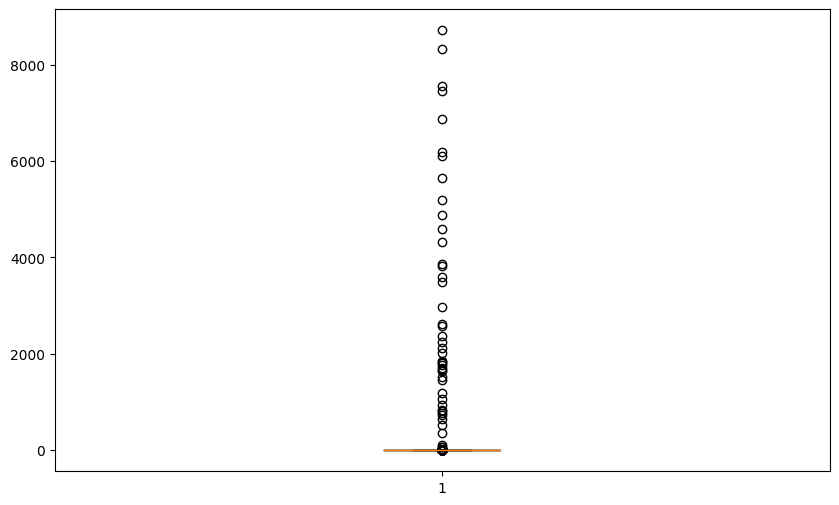

In [37]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['quanto_esta_usando_em_relação_ao_limite_de_crédito'], vert=True)

<Axes: >

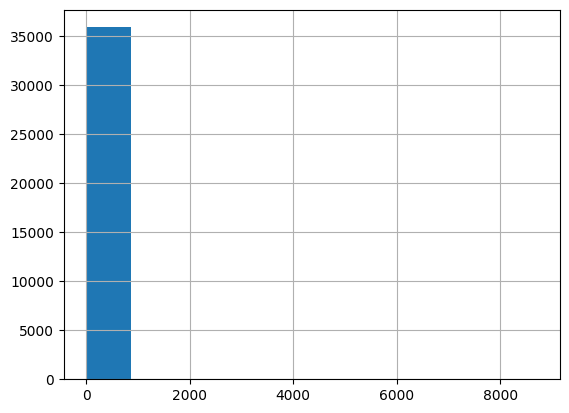

In [38]:
df['quanto_esta_usando_em_relação_ao_limite_de_crédito'].hist()

In [39]:
# OUTLIERS
# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df['quanto_esta_usando_em_relação_ao_limite_de_crédito'].quantile(0.25)
Q3 = df['quanto_esta_usando_em_relação_ao_limite_de_crédito'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_quanto_esta_usando_em_relação_ao_limite_de_crédito = df[(df['quanto_esta_usando_em_relação_ao_limite_de_crédito'] < lower_bound) | (df['quanto_esta_usando_em_relação_ao_limite_de_crédito'] > upper_bound)]
outliers_quanto_esta_usando_em_relação_ao_limite_de_crédito

print(lower_bound)
print(Q1)
print(Q3)
print(upper_bound)

-0.7459384256249999
0.02944540875
0.546367965
1.3217517993749999


In [40]:
outliers_quanto_esta_usando_em_relação_ao_limite_de_crédito.count()

id_usuario                                            173
indicador_inadimplencia                               173
quanto_esta_usando_em_relação_ao_limite_de_crédito    173
relacao_dividas_ativos                                173
mais_90_dias_atraso                                   173
idade                                                 173
sexo                                                  173
salario_ultimo_mes                                    173
numero_dependentes                                    173
total_imovel                                          173
total_outros                                          173
total_emprestimos                                     173
dummy_atraso                                          173
dummy_dependentes                                     173
dtype: int64

<Axes: >

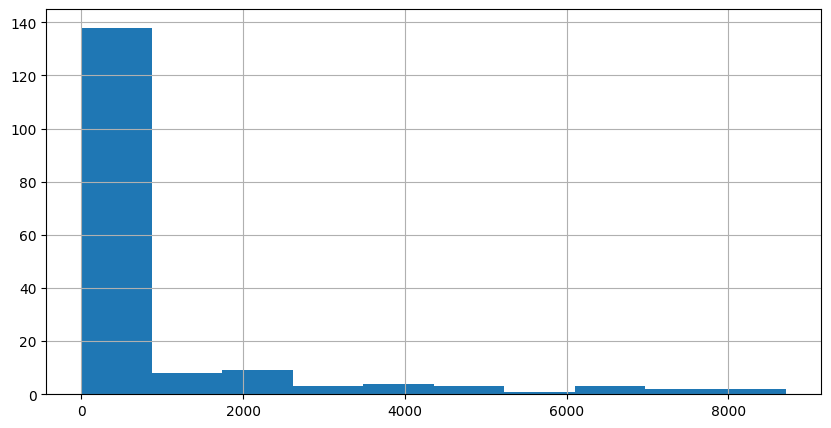

In [41]:
#DISTRIBUIÇÃO DOS OUTLIERS
outliers_quanto_esta_usando_em_relação_ao_limite_de_crédito['quanto_esta_usando_em_relação_ao_limite_de_crédito'].hist(figsize=(10, 5))

# **Criação faixas uso limite crédito**
*   Baixo Uso: 0 - 0.15 (valores até a mediana)
*   Uso Moderado: 0.16 - 0.55 (valores entre a mediana e o terceiro quartil)
*   Uso Alto: 0.56 - 1.32 (valores entre o terceiro quartil e o limite superior no boxplot, um valor significativo que representa 132% do limite de crédito)
*   Uso Extremo : 1.32+ (valores acima de 1.32, cobrindo os outliers extremos)











In [42]:
total_linhas_antes = df.shape[0]
print(f'Total de linhas antes da categorização: {total_linhas_antes}')

Total de linhas antes da categorização: 35932


In [43]:
# Divisão em faixas
bins = [0.0, 0.15, 0.55, 1.32,  float('inf')]
rotulos = ['Baixo Uso - 0 a 15%', 'Uso Moderado - 16% a 55%', 'Uso Alto - 56% a 132%', 'Uso Extremo - mais de 132% ']
df['faixa_uso_credito'] = pd.cut(df['quanto_esta_usando_em_relação_ao_limite_de_crédito'], bins=bins, labels=rotulos, include_lowest=True)

# Verificar distribuição dos dados
distribuicao_faixas = df['faixa_uso_credito'].value_counts()

# Visualizar
distribuicao_faixas

faixa_uso_credito
Baixo Uso - 0 a 15%            18018
Uso Moderado - 16% a 55%        9005
Uso Alto - 56% a 132%           8736
Uso Extremo - mais de 132%       173
Name: count, dtype: int64

In [44]:
# Verificar total de linhas após a categorização
total_linhas_depois = df['faixa_uso_credito'].notnull().sum()
print(f'Total de linhas após a categorização: {total_linhas_depois}')

Total de linhas após a categorização: 35932


# **ANÁLISE NÍVEL ENDIVIDAMENTO (RELAÇÃO DÍVIDAS X ATIVOS)**

*  Dos 35.932 clientes, 935 (2,6%) não têm nenhuma dívida
*  50% têm até 37% do patrimônio comprometido
*  25% têm mais de 87% do patrimônio comprometido
*  7.566 clientes (cerca de 21% da amostra) devem valores equivalentes a mais de 1,92 o valor do seu patrimônio





In [45]:
df.count()

id_usuario                                            35932
indicador_inadimplencia                               35932
quanto_esta_usando_em_relação_ao_limite_de_crédito    35932
relacao_dividas_ativos                                35932
mais_90_dias_atraso                                   35932
idade                                                 35932
sexo                                                  35932
salario_ultimo_mes                                    35932
numero_dependentes                                    35932
total_imovel                                          35932
total_outros                                          35932
total_emprestimos                                     35932
dummy_atraso                                          35932
dummy_dependentes                                     35932
faixa_uso_credito                                     35932
dtype: int64

In [46]:
df['relacao_dividas_ativos'].describe()

count   35932.00
mean      343.55
std      1198.50
min         0.00
25%         0.18
50%         0.37
75%         0.87
max     60212.00
Name: relacao_dividas_ativos, dtype: float64

In [47]:
#Clientes sem dívidas
df[df['relacao_dividas_ativos']==0.00]

,id_usuario,indicador_inadimplencia,quanto_esta_usando_em_relação_ao_limite_de_crédito,relacao_dividas_ativos,mais_90_dias_atraso,idade,sexo,salario_ultimo_mes,numero_dependentes,total_imovel,total_outros,total_emprestimos,dummy_atraso,dummy_dependentes,faixa_uso_credito
776,56,0,1.00,0.00,0,41,F,5408.00,0.00,0,0,0,0,0,Uso Alto - 56% a 132%
777,59,0,1.00,0.00,0,57,F,5408.00,0.00,0,0,0,0,0,Uso Alto - 56% a 132%
778,169,0,1.00,0.00,0,79,M,5408.00,0.00,0,0,0,0,0,Uso Alto - 56% a 132%
779,208,0,1.00,0.00,0,47,M,5408.00,0.00,0,0,0,0,0,Uso Alto - 56% a 132%
780,252,0,1.00,0.00,0,23,M,800.00,0.00,0,0,0,0,0,Uso Alto - 56% a 132%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29737,27583,0,0.00,0.00,0,57,M,4832.00,0.00,0,12,12,0,0,Baixo Uso - 0 a 15%
30064,34516,0,0.00,0.00,0,37,F,4122.00,3.00,0,12,12,0,1,Baixo Uso - 0 a 15%
30085,34994,0,0.00,0.00,0,71,M,5000.00,0.00,0,12,12,0,0,Baixo Uso - 0 a 15%
31893,14075,0,0.00,0.00,0,47,M,5000.00,0.00,0,14,14,0,0,Baixo Uso - 0 a 15%


In [48]:
#Devedores outliers
df[df['relacao_dividas_ativos']>=1.92]

,id_usuario,indicador_inadimplencia,quanto_esta_usando_em_relação_ao_limite_de_crédito,relacao_dividas_ativos,mais_90_dias_atraso,idade,sexo,salario_ultimo_mes,numero_dependentes,total_imovel,total_outros,total_emprestimos,dummy_atraso,dummy_dependentes,faixa_uso_credito
4,405,0,0.17,12403.00,0,69,M,5408.00,0.00,9,22,31,0,0,Uso Moderado - 16% a 55%
7,517,0,0.00,34.00,0,73,M,5408.00,0.00,0,24,24,0,0,Baixo Uso - 0 a 15%
18,1160,0,0.18,1897.00,0,61,M,5408.00,0.00,2,28,30,0,0,Uso Moderado - 16% a 55%
22,1274,0,0.25,2362.00,0,65,M,5408.00,0.00,0,27,27,0,0,Uso Moderado - 16% a 55%
27,1409,0,0.01,103.00,0,76,M,0.00,0.00,1,24,25,0,0,Baixo Uso - 0 a 15%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,31619,0,0.03,5088.00,0,44,F,5408.00,2.00,2,19,21,0,1,Baixo Uso - 0 a 15%
35979,32179,0,0.71,5174.00,0,54,F,5408.00,2.00,1,20,21,0,1,Uso Alto - 56% a 132%
35993,34690,0,0.05,3013.00,0,61,F,5408.00,0.00,2,19,21,0,0,Baixo Uso - 0 a 15%
35996,35795,0,0.01,1981.00,0,63,M,5408.00,2.00,0,21,21,0,1,Baixo Uso - 0 a 15%


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d048260b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d048265f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d04825e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d04826b30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d04826dd0>],
 'means': []}

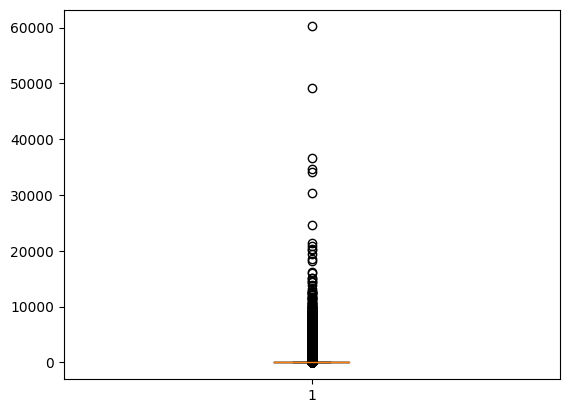

In [49]:
plt.boxplot(df['relacao_dividas_ativos'])

In [50]:
#IDENTIFICANDO OUTLIERS VARIÁVEL relacao_dividas_ativos

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df['relacao_dividas_ativos'].quantile(0.25)
Q3 = df['relacao_dividas_ativos'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_relacao_dividas_ativos = df[(df['relacao_dividas_ativos'] < lower_bound) | (df['relacao_dividas_ativos'] > upper_bound)]
outliers_relacao_dividas_ativos.count()

id_usuario                                            7565
indicador_inadimplencia                               7565
quanto_esta_usando_em_relação_ao_limite_de_crédito    7565
relacao_dividas_ativos                                7565
mais_90_dias_atraso                                   7565
idade                                                 7565
sexo                                                  7565
salario_ultimo_mes                                    7565
numero_dependentes                                    7565
total_imovel                                          7565
total_outros                                          7565
total_emprestimos                                     7565
dummy_atraso                                          7565
dummy_dependentes                                     7565
faixa_uso_credito                                     7565
dtype: int64

In [51]:
print(lower_bound)
print(Q1)
print(Q3)
print(upper_bound)

-0.869046175375
0.17706107525
0.874465909
1.920573159625


# **Criação faixas endividamento**
*   Baixo endividamento: 0 - 0.18(valores até o 1º quartil)
*   Endividamento moderado: 0.19 - 0.37 (valores entre o 1º quartil e a mediana)
*   Alto endividamento: 0.38 - 0.87 (valores entre a mediana e o 3º quartil)
*   Endividamento muito alto: 0.88 - 1.92 (valores entre o 3º quartil e o limite superior do boxplot)
*   Extremo endividamento: 1.92 +  (valores acima de 1.91, cobrindo os outliers extremos)

In [52]:
df['relacao_dividas_ativos'].describe()

count   35932.00
mean      343.55
std      1198.50
min         0.00
25%         0.18
50%         0.37
75%         0.87
max     60212.00
Name: relacao_dividas_ativos, dtype: float64

In [53]:
#Divisão faixas endividamento
bins = [0, 0.18, 0.37, 0.87, 1.92, float('inf')]
rotulos = ['Baixo endividamento - 0 a 18%', 'Endividamento moderado - 19% a 37%', 'Alto endividamento - 38% a 87%', 'Endividamento muito alto - 88% a 192%', 'Extremo endividamento - mais de 192%']
df['faixa_endividamento'] = pd.cut(df['relacao_dividas_ativos'], bins=bins, labels=rotulos, include_lowest=True)

# Verificar distribuição dos dados
distribuicao_faixas = df['faixa_endividamento'].value_counts()

# Visualizar
distribuicao_faixas

faixa_endividamento
Baixo endividamento - 0 a 18%            9123
Endividamento moderado - 19% a 37%       8981
Alto endividamento - 38% a 87%           8822
Extremo endividamento - mais de 192%     7566
Endividamento muito alto - 88% a 192%    1440
Name: count, dtype: int64

In [54]:
df.groupby('faixa_endividamento')['indicador_inadimplencia'].value_counts()

faixa_endividamento                    indicador_inadimplencia
Baixo endividamento - 0 a 18%          0                          9000
                                       1                           123
Endividamento moderado - 19% a 37%     0                          8842
                                       1                           139
Alto endividamento - 38% a 87%         0                          8620
                                       1                           202
Endividamento muito alto - 88% a 192%  0                          1390
                                       1                            50
Extremo endividamento - mais de 192%   0                          7448
                                       1                           118
Name: count, dtype: int64

# **ANÁLISE VARIÁVEL  ATRASO DO EMPRÉSTIMO EM MAIS DE 90 DIAS**
*   Dos 35.932 clientes, 94,75% nunca atrasaram o pagamento
*   1.735(4,83%) atrasaram entre 1 e 3 vezes
*   119 (0,33%) clientes atrasaram entre 4 e 6 vezes
*   Apenas 29 clientes(0,08%) atrasaram mais de 7 vezes





In [55]:
df['mais_90_dias_atraso'].describe()

count   35932.00
mean        0.09
std         0.50
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        15.00
Name: mais_90_dias_atraso, dtype: float64

In [56]:
34049/35932

0.9475954580874986

In [57]:
df.groupby('mais_90_dias_atraso')['id_usuario'].count()

mais_90_dias_atraso
0     34049
1      1220
2       355
3       160
4        77
5        23
6        19
7        10
8         4
9         4
10        2
11        3
12        2
13        2
14        1
15        1
Name: id_usuario, dtype: int64

In [58]:
#IDENTIFICANDO OULIERS VARIÁVEL mais_90_dias_atraso

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df['mais_90_dias_atraso'].quantile(0.25)
Q3 = df['mais_90_dias_atraso'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_mais_90_dias_atraso = df[(df['mais_90_dias_atraso'] < lower_bound) | (df['mais_90_dias_atraso'] > upper_bound)]
outliers_mais_90_dias_atraso.count()

id_usuario                                            1883
indicador_inadimplencia                               1883
quanto_esta_usando_em_relação_ao_limite_de_crédito    1883
relacao_dividas_ativos                                1883
mais_90_dias_atraso                                   1883
idade                                                 1883
sexo                                                  1883
salario_ultimo_mes                                    1883
numero_dependentes                                    1883
total_imovel                                          1883
total_outros                                          1883
total_emprestimos                                     1883
dummy_atraso                                          1883
dummy_dependentes                                     1883
faixa_uso_credito                                     1883
faixa_endividamento                                   1883
dtype: int64

In [59]:
print(lower_bound)
print(Q1)
print(Q3)
print(upper_bound)

0.0
0.0
0.0
0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d046aff70>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d046e03d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d046afcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d046e0910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d046e0bb0>],
 'means': []}

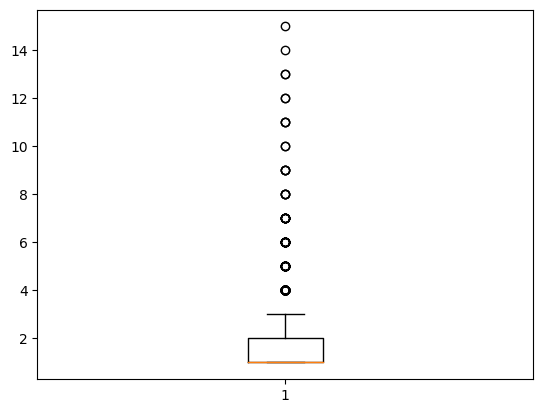

In [60]:
#BOXPLOT OUTLIERS

plt.boxplot(outliers_mais_90_dias_atraso['mais_90_dias_atraso'], vert=True)

# **Criação faixas atraso**


*  Nenhum atraso: 0 vezes
*  Poucos atrasos: 1 a 3 vezes (embora tenham poucos atrasos, requerem atenção)
*  Atrasos moderados: 4 a 6 vezes (comportamento mais preocupante)
*  Muitos atrasos: mais de 7 vezes (comportamento indicando um risco maior)


In [61]:
# Função para categorizar os dados referentes ao número de atrasos
def categorizar_atrasos(atrasos):
    if atrasos == 0:
        return 'Nenhum atraso'
    elif 1 <= atrasos <= 3:
        return 'Poucos atrasos (1 a 3 vezes)'
    elif 4 <= atrasos <= 6:
        return 'Atrasos moderados (4 a 6 vezes)'
    elif atrasos >= 7:
        return 'Muitos atrasos (mais de 7 vezes)'
    else:
        return 'Outros'  # Caso existam outros valores não previstos


In [62]:
#Aplicando a função
df['faixa_atrasos'] = df['mais_90_dias_atraso'].apply(categorizar_atrasos)
df['faixa_atrasos']

0                          Nenhum atraso
1                          Nenhum atraso
2                          Nenhum atraso
3                          Nenhum atraso
4                          Nenhum atraso
                      ...               
35995                      Nenhum atraso
35996                      Nenhum atraso
35997                      Nenhum atraso
35998    Atrasos moderados (4 a 6 vezes)
35999       Poucos atrasos (1 a 3 vezes)
Name: faixa_atrasos, Length: 35932, dtype: object

In [63]:
df['faixa_atrasos'].value_counts()

faixa_atrasos
Nenhum atraso                       34049
Poucos atrasos (1 a 3 vezes)         1735
Atrasos moderados (4 a 6 vezes)       119
Muitos atrasos (mais de 7 vezes)       29
Name: count, dtype: int64

# **ANÁLISE DISTRIBUIÇÃO DAS IDADES**
*  A idade dos clientes está bem distribuida , tendo por média 52 anos



In [64]:
df['idade'].describe()

count   35932.00
mean       52.45
std        14.78
min        21.00
25%        41.00
50%        52.00
75%        63.00
max       109.00
Name: idade, dtype: float64

In [65]:
#idade mulheres
df[df['sexo']=='F']['idade'].describe()

count   14371.00
mean       52.44
std        14.88
min        21.00
25%        41.00
50%        52.00
75%        63.00
max       103.00
Name: idade, dtype: float64

In [66]:
#idade homens
df[df['sexo']=='M']['idade'].describe()

count   21561.00
mean       52.45
std        14.71
min        21.00
25%        41.00
50%        52.00
75%        63.00
max       109.00
Name: idade, dtype: float64

In [67]:
df.columns

Index(['id_usuario', 'indicador_inadimplencia',
       'quanto_esta_usando_em_relação_ao_limite_de_crédito',
       'relacao_dividas_ativos', 'mais_90_dias_atraso', 'idade', 'sexo',
       'salario_ultimo_mes', 'numero_dependentes', 'total_imovel',
       'total_outros', 'total_emprestimos', 'dummy_atraso',
       'dummy_dependentes', 'faixa_uso_credito', 'faixa_endividamento',
       'faixa_atrasos'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d04703c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d047681c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d047039a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d04768700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d047689a0>],
 'means': []}

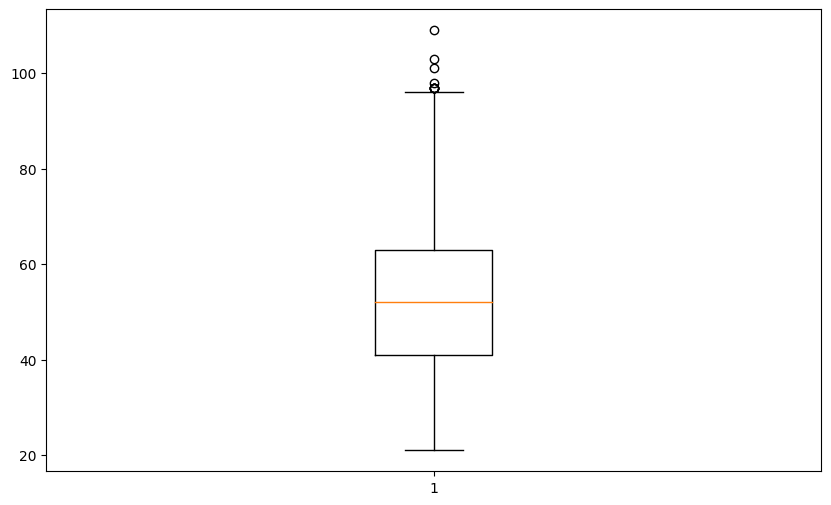

In [68]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['idade'], vert=True)

In [69]:
#IDENTIFICANDO OUTLIERS IDADE

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df['idade'].quantile(0.25)
Q3 = df['idade'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_idade = df[(df['idade'] < lower_bound) | (df['idade'] > upper_bound)]
print(outliers_idade['idade'].min())
print(outliers_idade['idade'].max())
print(outliers_idade['idade'].count())



97
109
10


<Axes: >

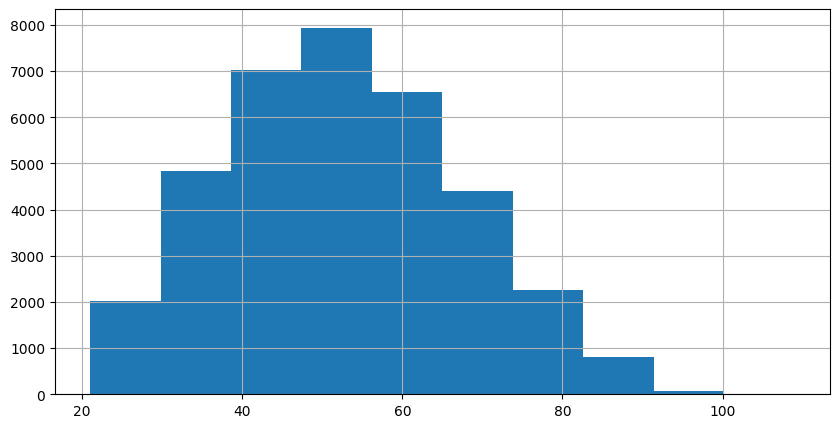

In [70]:
df['idade'].hist(figsize=(10, 5))

# **Criação faixas idade**
*   21-30 anos: Jovens adultos
*   31-40 anos: Adultos jovens
*   41-50 anos: Adultos de meia-idade
*   51-60 anos: Adultos maduros
*   61-70 anos: Idosos jovens
*   71 anos ou mais: Idosos

In [71]:
bins= [21, 30, 40, 50, 60, 70, float('inf')]
rotulos = ['Jovens adultos 21-30 anos', 'Adultos jovens 31-40 anos', 'Adultos de meia-idade 41-50 anos', 'Adultos maduros 51-60 anos', 'Idosos jovens 61-70 anos', 'Idosos 71 anos ou mais']
df['faixa_idade'] = pd.cut(df['idade'], bins=bins, labels=rotulos, include_lowest=True)

# Verificar distribuição dos dados
distribuicao_faixas = df['faixa_idade'].value_counts()
distribuicao_faixas


faixa_idade
Adultos de meia-idade 41-50 anos    8447
Adultos maduros 51-60 anos          8339
Idosos jovens 61-70 anos            6632
Adultos jovens 31-40 anos           5723
Idosos 71 anos ou mais              4265
Jovens adultos 21-30 anos           2526
Name: count, dtype: int64

# **ANÁLISE DISTRIBUIÇÃO SALÁRIOS**


*   Metade dos clientes recebe menos de 5.408, portanto, abaixo da média que é 6.425




In [72]:
df['salario_ultimo_mes'].describe()

count     35932.00
mean       6425.12
std       11614.16
min           0.00
25%        3907.25
50%        5408.00
75%        7423.25
max     1560100.00
Name: salario_ultimo_mes, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d04652230>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d04652770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d04651f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d04652cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d04652f50>],
 'means': []}

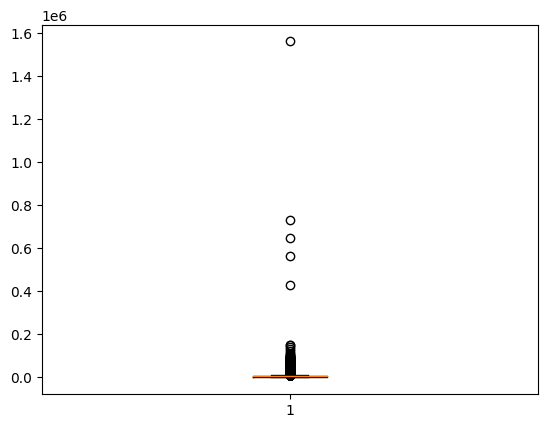

In [73]:
plt.boxplot(df['salario_ultimo_mes'], vert=True)

<Axes: >

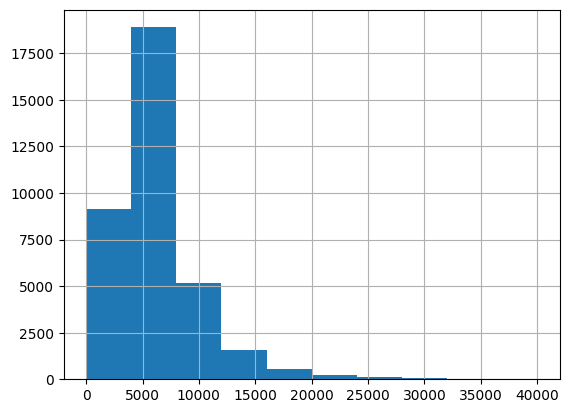

In [74]:
#distribuição dos salários é assimétrica à direita (positivamente assimétrica),
#Isso geralmente ocorre quando há alguns salários muito altos que elevam a média, mas a maioria dos salários é relativamente menor
df_sal=df.loc[df['salario_ultimo_mes'] <= 40000]
df_sal['salario_ultimo_mes'].hist()


In [75]:
#IDENTIFICANDO OUTLIERS VARIÁVEL SALÁRIO ULTIMO MES

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df['salario_ultimo_mes'].quantile(0.25)
Q3 = df['salario_ultimo_mes'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_salarios = df[(df['salario_ultimo_mes'] < lower_bound) | (df['salario_ultimo_mes'] > upper_bound)]
outliers_salarios.count()


id_usuario                                            2184
indicador_inadimplencia                               2184
quanto_esta_usando_em_relação_ao_limite_de_crédito    2184
relacao_dividas_ativos                                2184
mais_90_dias_atraso                                   2184
idade                                                 2184
sexo                                                  2184
salario_ultimo_mes                                    2184
numero_dependentes                                    2184
total_imovel                                          2184
total_outros                                          2184
total_emprestimos                                     2184
dummy_atraso                                          2184
dummy_dependentes                                     2184
faixa_uso_credito                                     2184
faixa_endividamento                                   2184
faixa_atrasos                                         21

In [76]:
print(lower_bound)
print(Q1)
print(Q3)
print(upper_bound)

-1366.75
3907.25
7423.25
12697.25


# **Criação faixas salário**
*   Salário Baixo: Abaixo do 1º quartil (<= 3.908,00)
*   Salário Médio-Baixo: Entre o 1º quartil e a mediana (3.908,01 a 5.408,00)
*   Salário Médio: Entre a mediana e o 3º quartil (5.408,01 a 7.424,00)
*   Salário Médio-Alto: Entre o 3º quartil  e o limite máximo do boxplot (7.424,01 a 12.698,00)
*   Salário Alto: Acima do limite máximo do boxplot (12.698,01)


In [77]:
bins= [0, 3908, 5408, 7424, 12698, float('inf')]
rotulos = ['Salário Baixo (menos de 3.908,00)', 'Salário Médio-Baixo (de 3.908,01 a 5.408,00)', 'Salário Médio (de 5.408,01 a 7.424,00)', 'Salário Médio-Alto (de 7.424,01 a 12.698,00)', 'Salário Alto (acima de 12.698,01)']
df['faixa_salario'] = pd.cut(df['salario_ultimo_mes'], bins=bins, labels=rotulos, include_lowest=True)

# Verificar distribuição dos dados
distribuicao_faixas = df['faixa_salario'].value_counts()
distribuicao_faixas

faixa_salario
Salário Médio-Baixo (de 3.908,01 a 5.408,00)    12564
Salário Baixo (menos de 3.908,00)                8985
Salário Médio-Alto (de 7.424,01 a 12.698,00)     6798
Salário Médio (de 5.408,01 a 7.424,00)           5401
Salário Alto (acima de 12.698,01)                2184
Name: count, dtype: int64

# **ANÁLISE NÚMERO DEPENDENTES**
*   60,67% dos clientes não possuem dependentes
*   30,34% tem entre 1 e 2 filhos


In [78]:
df['numero_dependentes'].describe()

count   35932.00
mean        0.74
std         1.11
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        13.00
Name: numero_dependentes, dtype: float64

In [79]:
df.groupby('numero_dependentes')['id_usuario'].count()

numero_dependentes
0.00     21803
1.00      6192
2.00      4711
3.00      2322
4.00       668
5.00       171
6.00        40
7.00        12
8.00         8
9.00         3
10.00        1
13.00        1
Name: id_usuario, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d0457dbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d0457e110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d0457d930>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d0457e650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d0457e8f0>],
 'means': []}

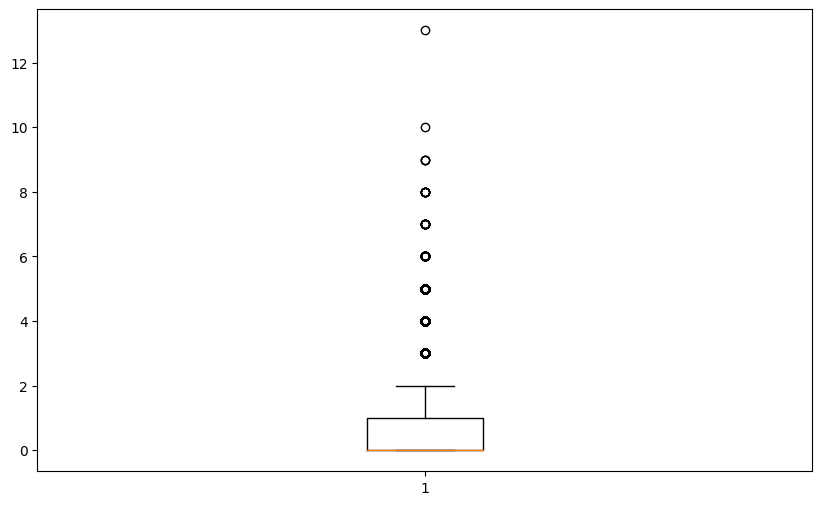

In [80]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['numero_dependentes'], vert=True)

<Axes: >

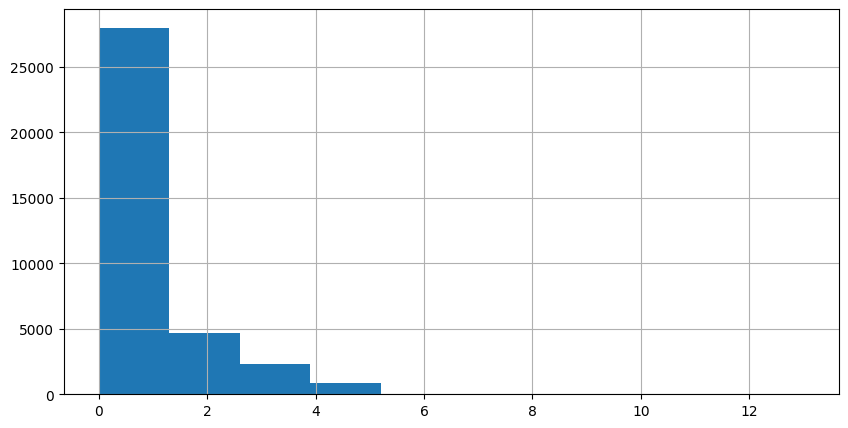

In [81]:
df['numero_dependentes'].hist(figsize=(10, 5))

In [82]:
#IDENTIFICANDO OULIERS VARIÁVEL NUMERO DEPENDENTES

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df['numero_dependentes'].quantile(0.25)
Q3 = df['numero_dependentes'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_n_dependentes = df[(df['numero_dependentes'] < lower_bound) | (df['numero_dependentes'] > upper_bound)]
outliers_n_dependentes
outliers_n_dependentes.count()

id_usuario                                            3226
indicador_inadimplencia                               3226
quanto_esta_usando_em_relação_ao_limite_de_crédito    3226
relacao_dividas_ativos                                3226
mais_90_dias_atraso                                   3226
idade                                                 3226
sexo                                                  3226
salario_ultimo_mes                                    3226
numero_dependentes                                    3226
total_imovel                                          3226
total_outros                                          3226
total_emprestimos                                     3226
dummy_atraso                                          3226
dummy_dependentes                                     3226
faixa_uso_credito                                     3226
faixa_endividamento                                   3226
faixa_atrasos                                         32

In [83]:
print(lower_bound)
print(Q1)
print(Q3)
print(upper_bound)

-1.5
0.0
1.0
2.5


# **Criação faixas número dependentes**
*   Sem dependentes
*   1 dependente
*   2 dependentes
*   3 dependentes
*   4 dependentes
*   Mais de 5 dependentes


In [84]:
def categorizar_numero_dependentes(numero_dependentes):
    if numero_dependentes == 0:
        return 'Sem dependentes'
    elif numero_dependentes == 1:
        return '1 dependente'
    elif numero_dependentes == 2:
        return '2 dependentes'
    elif numero_dependentes == 3:
        return '3 dependentes'
    elif numero_dependentes == 4:
        return '4 dependentes'
    elif numero_dependentes >=5:
        return 'Mais de 5 dependentes'
    else:
        return 'Outros'

In [85]:
df['faixa_numero_dependentes'] = df['numero_dependentes'].apply(categorizar_numero_dependentes)

df['faixa_numero_dependentes'].value_counts()

faixa_numero_dependentes
Sem dependentes          21803
1 dependente              6192
2 dependentes             4711
3 dependentes             2322
4 dependentes              668
Mais de 5 dependentes      236
Name: count, dtype: int64

# **ANÁLISE NÚMERO TOTAL EMPRÉSTIMOS**
*   Metade dos clientes possui cerca de 8 empréstimos ativos





In [86]:
df['total_emprestimos'].describe()

count   35932.00
mean        8.50
std         5.17
min         0.00
25%         5.00
50%         8.00
75%        11.00
max        57.00
Name: total_emprestimos, dtype: float64

In [87]:
df['total_emprestimos'].sum()

305297

In [88]:
#total outros empréstimos
df[['total_outros']].sum()

total_outros    268745
dtype: int64

In [89]:
#total imovel
df[['total_imovel']].sum()

total_imovel    36552
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35932 entries, 0 to 35999
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   id_usuario                                          35932 non-null  int64   
 1   indicador_inadimplencia                             35932 non-null  int64   
 2   quanto_esta_usando_em_relação_ao_limite_de_crédito  35932 non-null  float64 
 3   relacao_dividas_ativos                              35932 non-null  float64 
 4   mais_90_dias_atraso                                 35932 non-null  int64   
 5   idade                                               35932 non-null  int64   
 6   sexo                                                35932 non-null  object  
 7   salario_ultimo_mes                                  35932 non-null  float64 
 8   numero_dependentes                                  35932 non-null  flo

In [91]:
#IDENTIFICANDO OUTLIERS TOTAL EMPRESTIMOS

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df['total_emprestimos'].quantile(0.25)
Q3 = df['total_emprestimos'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_total_emprestimos = df[(df['total_emprestimos'] < lower_bound) | (df['total_emprestimos'] > upper_bound)]
outliers_total_emprestimos
outliers_total_emprestimos.count()

id_usuario                                            975
indicador_inadimplencia                               975
quanto_esta_usando_em_relação_ao_limite_de_crédito    975
relacao_dividas_ativos                                975
mais_90_dias_atraso                                   975
idade                                                 975
sexo                                                  975
salario_ultimo_mes                                    975
numero_dependentes                                    975
total_imovel                                          975
total_outros                                          975
total_emprestimos                                     975
dummy_atraso                                          975
dummy_dependentes                                     975
faixa_uso_credito                                     975
faixa_endividamento                                   975
faixa_atrasos                                         975
faixa_idade   

In [92]:
print(lower_bound)
print(Q1)
print(Q3)
print(upper_bound)

-4.0
5.0
11.0
20.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3d0437a1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3d0437a6e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3d04379f00>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3d0437ac20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3d0437aec0>],
 'means': []}

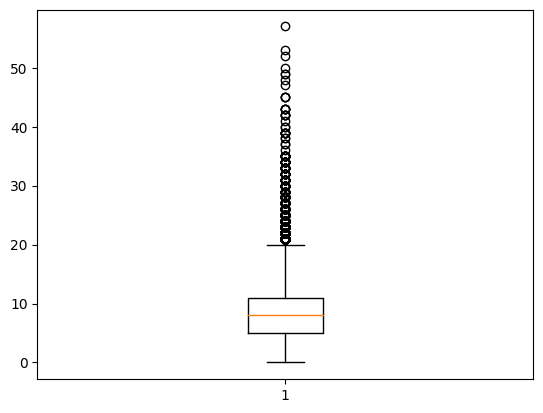

In [93]:

plt.boxplot(df['total_emprestimos'], vert=True)

# **Criação faixas números empréstimos**
*   Nenhum empréstimo: 0 empréstimos
*   Poucos empréstimos: 1 a 10 empréstimos
*   Empréstimos moderados: 11 a 20 empréstimos
*   Muitos empréstimos: 21 a 30 empréstimos
*   Empréstimos elevados: 31 a 40 empréstimos
*   Empréstimos muito elevados: 41 a 57 empréstimos

In [94]:
# Função para categorizar os dados referentes ao número de empréstimos
def categorizar_numero_emprestimos(total_emprestimos):
    if total_emprestimos == 0:
        return 'Nenhum empréstimo'
    elif 1 <= total_emprestimos <= 10:
        return 'Poucos empréstimos (1 a 10)'
    elif 11 <= total_emprestimos <= 20:
        return 'Empréstimos moderados (11 a 20)'
    elif 21 <= total_emprestimos <= 30:
        return 'Muitos empréstimos (21 a 30)'
    elif 31 <= total_emprestimos <= 40:
        return 'Empréstimos elevados (31 a 40)'
    elif total_emprestimos >= 41:
        return 'Empréstimos muito elevados (mais de 41)'
    else:
        return 'Outros'

In [95]:
df['faixa_numero_emprestimos'] = df['total_emprestimos'].apply(categorizar_numero_emprestimos)

df['faixa_numero_emprestimos'].value_counts()


faixa_numero_emprestimos
Poucos empréstimos (1 a 10)                25238
Empréstimos moderados (11 a 20)             9356
Muitos empréstimos (21 a 30)                 872
Nenhum empréstimo                            363
Empréstimos elevados (31 a 40)                83
Empréstimos muito elevados (mais de 41)       20
Name: count, dtype: int64

In [96]:
df.groupby('total_emprestimos')['id_usuario'].count()

total_emprestimos
0      363
1     1064
2     1581
3     2136
4     2794
5     3054
6     3271
7     3234
8     3048
9     2787
10    2269
11    2007
12    1700
13    1363
14    1048
15     885
16     745
17     562
18     400
19     357
20     289
21     199
22     149
23     129
24      99
25      99
26      62
27      53
28      36
29      21
30      25
31      15
32      12
33      15
34      14
35      14
36       1
37       2
38       2
39       6
40       2
41       1
42       4
43       4
45       3
47       1
48       1
49       2
50       1
52       1
53       1
57       1
Name: id_usuario, dtype: int64

# Função para formatar os números com 4 casas decimais após a vírgula

In [97]:
#Função para formatar os números em um formato mais legível
pd.options.display.float_format = '{:.4f}'.format

# **CÁLCULO TAXA INADIMPLÊNCIA E RISCO DE CRÉDITO POR CATEGORIA dE CADA VARIÁVEL**
*   Dos 35.932 clientes, apenas 632 já ficaram inadimplentes, portanto, a taxa de inadimplência geral é de aprox. 1,76%




In [98]:
df['indicador_inadimplencia'].value_counts()

indicador_inadimplencia
0    35300
1      632
Name: count, dtype: int64

In [99]:
35300+632


35932

In [100]:
df['indicador_inadimplencia'].value_counts(normalize=True)

indicador_inadimplencia
0   0.9824
1   0.0176
Name: proportion, dtype: float64

In [101]:
taxa_inadimplencia_geral=df['indicador_inadimplencia'].mean()*100
taxa_inadimplencia_geral

1.7588778804408327

# **Taxa de inadimplência e risco de acordo com o uso do limite de crédito**
*   A maior taxa de inadimplência está entre os clientes cujo uso do limite de crédito é considerado extremo, essa taxa é de 28,90%. A segunda maior taxa é dos clientes com alto uso, onde a taxa é de 6,16%




In [102]:
risco_relativo_uso_credito=(df.groupby('faixa_uso_credito')['indicador_inadimplencia'].mean()*100).to_frame()
risco_relativo_uso_credito.rename(columns={'indicador_inadimplencia': 'probab_inadimplencia %'}, inplace=True)
risco_relativo_uso_credito ['risco_relativo']=risco_relativo_uso_credito['probab_inadimplencia %']/taxa_inadimplencia_geral
risco_relativo_uso_credito['classif_risco_uso_crédito'] = risco_relativo_uso_credito['risco_relativo'].apply(
    lambda x: 'baixo risco' if x <= 1 else 'alto risco')
risco_relativo_uso_credito.reset_index(inplace=True)
risco_relativo_uso_credito



,faixa_uso_credito,probab_inadimplencia %,risco_relativo,classif_risco_uso_crédito
0,Baixo Uso - 0 a 15%,0.0500,0.0284,baixo risco
1,Uso Moderado - 16% a 55%,0.3776,0.2147,baixo risco
2,Uso Alto - 56% a 132%,6.1699,3.5078,alto risco
3,Uso Extremo - mais de 132%,28.9017,16.4319,alto risco


In [103]:
dict_uso_credito = dict(zip(risco_relativo_uso_credito['faixa_uso_credito'], risco_relativo_uso_credito['classif_risco_uso_crédito']))
df['classif_risco_uso_crédito'] = df['faixa_uso_credito'].map(dict_uso_credito)
df['classif_risco_uso_crédito']

0        baixo risco
1        baixo risco
2        baixo risco
3        baixo risco
4        baixo risco
            ...     
35995    baixo risco
35996    baixo risco
35997    baixo risco
35998    baixo risco
35999     alto risco
Name: classif_risco_uso_crédito, Length: 35932, dtype: object

In [104]:
df.groupby(['faixa_uso_credito'])['indicador_inadimplencia'].value_counts()

faixa_uso_credito            indicador_inadimplencia
Baixo Uso - 0 a 15%          0                          18009
                             1                              9
Uso Moderado - 16% a 55%     0                           8971
                             1                             34
Uso Alto - 56% a 132%        0                           8197
                             1                            539
Uso Extremo - mais de 132%   0                            123
                             1                             50
Name: count, dtype: int64

# **Taxa de inadimplência e risco de acordo com o nível de endividamento**
*   Os maiores índices de inadimplência está entre os clientes cujo nível de endividamento é considerado alto a muito alto (Esses clientes possuem dívidas que variam entre 38 a 192% o valor do seu patrimônio).
*   Um aspecto importante observado foi que clientes com dívidas extremas (mais de 192% ) têm menor probabilidade de inadimplência, probabilidade essa que se aproxima de clientes com nível de endividamento considerado baixo a moderado






In [105]:
risco_relativo_nivel_endividamento=(df.groupby('faixa_endividamento')['indicador_inadimplencia'].mean()*100).to_frame()
risco_relativo_nivel_endividamento.rename(columns={'indicador_inadimplencia': 'probab_inadimplencia %'}, inplace=True)
risco_relativo_nivel_endividamento ['risco_relativo']=risco_relativo_nivel_endividamento['probab_inadimplencia %']/taxa_inadimplencia_geral
risco_relativo_nivel_endividamento['classif_risco_nivel_dividas'] = risco_relativo_nivel_endividamento['risco_relativo'].apply(
    lambda x: 'baixo risco' if x <= 1 else 'alto risco')
risco_relativo_nivel_endividamento.reset_index(inplace=True)
risco_relativo_nivel_endividamento


,faixa_endividamento,probab_inadimplencia %,risco_relativo,classif_risco_nivel_dividas
0,Baixo endividamento - 0 a 18%,1.3482,0.7665,baixo risco
1,Endividamento moderado - 19% a 37%,1.5477,0.8799,baixo risco
2,Alto endividamento - 38% a 87%,2.2897,1.3018,alto risco
3,Endividamento muito alto - 88% a 192%,3.4722,1.9741,alto risco
4,Extremo endividamento - mais de 192%,1.5596,0.8867,baixo risco


In [106]:
df.groupby('faixa_endividamento')['indicador_inadimplencia'].value_counts()

faixa_endividamento                    indicador_inadimplencia
Baixo endividamento - 0 a 18%          0                          9000
                                       1                           123
Endividamento moderado - 19% a 37%     0                          8842
                                       1                           139
Alto endividamento - 38% a 87%         0                          8620
                                       1                           202
Endividamento muito alto - 88% a 192%  0                          1390
                                       1                            50
Extremo endividamento - mais de 192%   0                          7448
                                       1                           118
Name: count, dtype: int64

In [107]:
dict_nivel_endividamento = dict(zip(risco_relativo_nivel_endividamento['faixa_endividamento'], risco_relativo_nivel_endividamento['classif_risco_nivel_dividas']))
df['classif_risco_nivel_dividas'] = df['faixa_endividamento'].map(dict_nivel_endividamento)


# **Taxa inadimplência em relação ao atraso nos pagamentos em mais de 90 dias**

*   Como esperado, clientes que costumam atrasar seus pagamentos apresentam os maiores índices de inadimplência
**negrito**


In [108]:
df.groupby('faixa_atrasos')['indicador_inadimplencia'].value_counts()

faixa_atrasos                     indicador_inadimplencia
Atrasos moderados (4 a 6 vezes)   1                             95
                                  0                             24
Muitos atrasos (mais de 7 vezes)  1                             21
                                  0                              8
Nenhum atraso                     0                          33993
                                  1                             56
Poucos atrasos (1 a 3 vezes)      0                           1275
                                  1                            460
Name: count, dtype: int64

In [109]:
risco_relativo_numero_atrasos = (df.groupby('faixa_atrasos')['indicador_inadimplencia'].mean()*100).to_frame()
risco_relativo_numero_atrasos.rename(columns={'indicador_inadimplencia': 'probab_inadimplencia %'}, inplace=True)
risco_relativo_numero_atrasos ['risco_relativo']=risco_relativo_numero_atrasos['probab_inadimplencia %']/taxa_inadimplencia_geral
risco_relativo_numero_atrasos['classif_risco_numero_atrasos'] = risco_relativo_numero_atrasos['risco_relativo'].apply(
    lambda x: 'baixo risco' if x <= 1 else 'alto risco')
risco_relativo_numero_atrasos.reset_index(inplace=True)
risco_relativo_numero_atrasos


,faixa_atrasos,probab_inadimplencia %,risco_relativo,classif_risco_numero_atrasos
0,Atrasos moderados (4 a 6 vezes),79.8319,45.3880,alto risco
1,Muitos atrasos (mais de 7 vezes),72.4138,41.1704,alto risco
2,Nenhum atraso,0.1645,0.0935,baixo risco
3,Poucos atrasos (1 a 3 vezes),26.5130,15.0738,alto risco


In [110]:
dict_numero_atrasos = dict(zip(risco_relativo_numero_atrasos['faixa_atrasos'], risco_relativo_numero_atrasos['classif_risco_numero_atrasos']))
df['classif_risco_numero_atrasos'] = df['faixa_atrasos'].map(dict_numero_atrasos)

In [111]:
df.groupby('faixa_atrasos')['indicador_inadimplencia'].value_counts()

faixa_atrasos                     indicador_inadimplencia
Atrasos moderados (4 a 6 vezes)   1                             95
                                  0                             24
Muitos atrasos (mais de 7 vezes)  1                             21
                                  0                              8
Nenhum atraso                     0                          33993
                                  1                             56
Poucos atrasos (1 a 3 vezes)      0                           1275
                                  1                            460
Name: count, dtype: int64

In [112]:
dict_numero_atrasos = dict(zip(risco_relativo_numero_atrasos['faixa_atrasos'], risco_relativo_numero_atrasos['classif_risco_numero_atrasos']))

# **Taxa inadimplência e risco de acordo com a faixa salarial**
*   A maior taxa de inadimplência está entre os clientes cujos salários são os mais baixos (8,13%)


In [113]:
risco_relativo_salario = (df.groupby('faixa_salario')['indicador_inadimplencia'].mean()*100).to_frame()
risco_relativo_salario.rename(columns={'indicador_inadimplencia': 'probab_inadimplencia %'}, inplace=True)
risco_relativo_salario ['risco_relativo']=risco_relativo_salario['probab_inadimplencia %']/taxa_inadimplencia_geral
risco_relativo_salario['classif_risco_salario'] = risco_relativo_salario['risco_relativo'].apply(
    lambda x: 'baixo risco' if x <= 1 else 'alto risco')
risco_relativo_salario.reset_index(inplace=True)
risco_relativo_salario

,faixa_salario,probab_inadimplencia %,risco_relativo,classif_risco_salario
0,"Salário Baixo (menos de 3.908,00)",2.7490,1.5629,alto risco
1,"Salário Médio-Baixo (de 3.908,01 a 5.408,00)",1.7351,0.9865,baixo risco
2,"Salário Médio (de 5.408,01 a 7.424,00)",1.7404,0.9895,baixo risco
3,"Salário Médio-Alto (de 7.424,01 a 12.698,00)",0.9267,0.5269,baixo risco
4,"Salário Alto (acima de 12.698,01)",0.4579,0.2603,baixo risco


In [114]:
df.groupby('faixa_salario')['indicador_inadimplencia'].value_counts()

faixa_salario                                 indicador_inadimplencia
Salário Baixo (menos de 3.908,00)             0                           8738
                                              1                            247
Salário Médio-Baixo (de 3.908,01 a 5.408,00)  0                          12346
                                              1                            218
Salário Médio (de 5.408,01 a 7.424,00)        0                           5307
                                              1                             94
Salário Médio-Alto (de 7.424,01 a 12.698,00)  0                           6735
                                              1                             63
Salário Alto (acima de 12.698,01)             0                           2174
                                              1                             10
Name: count, dtype: int64

In [115]:
dict_salario = dict(zip(risco_relativo_salario['faixa_salario'], risco_relativo_salario['classif_risco_salario']))
df['classif_risco_salario'] = df['faixa_salario'].map(dict_salario)

# **Taxa de inadimplência e risco de acordo com faixa etária**
*  O grupo de clientes que têm maior incidência de inadimplentes é o grupo que tem entre 21 e 30 anos com 9,22%



In [116]:
risco_relativo_idade = (df.groupby('faixa_idade')['indicador_inadimplencia'].mean()*100).to_frame()
risco_relativo_idade.rename(columns={'indicador_inadimplencia': 'probab_inadimplencia %'}, inplace=True)
risco_relativo_idade ['risco_relativo']=risco_relativo_idade['probab_inadimplencia %']/taxa_inadimplencia_geral
risco_relativo_idade['classif_risco_idade'] = risco_relativo_idade['risco_relativo'].apply(
    lambda x: 'baixo risco' if x <= 1.2385 else 'alto risco')
risco_relativo_idade.reset_index(inplace=True)
risco_relativo_idade

,faixa_idade,probab_inadimplencia %,risco_relativo,classif_risco_idade
0,Jovens adultos 21-30 anos,2.8504,1.6206,alto risco
1,Adultos jovens 31-40 anos,3.1627,1.7981,alto risco
2,Adultos de meia-idade 41-50 anos,2.1783,1.2385,baixo risco
3,Adultos maduros 51-60 anos,1.5589,0.8863,baixo risco
4,Idosos jovens 61-70 anos,0.6785,0.3858,baixo risco
5,Idosos 71 anos ou mais,0.4689,0.2666,baixo risco


In [117]:
dict_idade = dict(zip(risco_relativo_idade['faixa_idade'], risco_relativo_idade['classif_risco_idade']))
df['classif_risco_idade'] = df['faixa_idade'].map(dict_idade)

In [118]:
df.groupby('faixa_idade')['indicador_inadimplencia'].value_counts()

faixa_idade                       indicador_inadimplencia
Jovens adultos 21-30 anos         0                          2454
                                  1                            72
Adultos jovens 31-40 anos         0                          5542
                                  1                           181
Adultos de meia-idade 41-50 anos  0                          8263
                                  1                           184
Adultos maduros 51-60 anos        0                          8209
                                  1                           130
Idosos jovens 61-70 anos          0                          6587
                                  1                            45
Idosos 71 anos ou mais            0                          4245
                                  1                            20
Name: count, dtype: int64

# **Taxa inadimplência de acordo com o número de dependentes**
*   Clientes com maior número de dependentes tem maiores índices de inadimplencia
*   Em contrapartida, clientes sem dependentes tem o menor índice



In [119]:
df.groupby('faixa_numero_dependentes')['indicador_inadimplencia'].value_counts()

faixa_numero_dependentes  indicador_inadimplencia
1 dependente              0                           6063
                          1                            129
2 dependentes             0                           4611
                          1                            100
3 dependentes             0                           2259
                          1                             63
4 dependentes             0                            649
                          1                             19
Mais de 5 dependentes     0                            224
                          1                             12
Sem dependentes           0                          21494
                          1                            309
Name: count, dtype: int64

In [120]:
risco_relativo_numero_dependentes = (df.groupby('faixa_numero_dependentes')['indicador_inadimplencia'].mean()*100).to_frame()
risco_relativo_numero_dependentes=risco_relativo_numero_dependentes.rename(columns={'indicador_inadimplencia': 'probab_inadimplencia %'})
risco_relativo_numero_dependentes['risco_relativo']=risco_relativo_numero_dependentes['probab_inadimplencia %']/taxa_inadimplencia_geral
risco_relativo_numero_dependentes['classif_risco_numero_dependentes'] = risco_relativo_numero_dependentes['risco_relativo'].apply(
    lambda x: 'baixo risco' if x <= 1.2069 else 'alto risco')
risco_relativo_numero_dependentes.reset_index(inplace=True)
risco_relativo_numero_dependentes

,faixa_numero_dependentes,probab_inadimplencia %,risco_relativo,classif_risco_numero_dependentes
0,1 dependente,2.0833,1.1845,baixo risco
1,2 dependentes,2.1227,1.2068,baixo risco
2,3 dependentes,2.7132,1.5426,alto risco
3,4 dependentes,2.8443,1.6171,alto risco
4,Mais de 5 dependentes,5.0847,2.8909,alto risco
5,Sem dependentes,1.4172,0.8058,baixo risco


In [121]:
dict_numero_dependentes = dict(zip(risco_relativo_numero_dependentes['faixa_numero_dependentes'], risco_relativo_numero_dependentes['classif_risco_numero_dependentes']))
df['classif_risco_numero_dependentes'] = df['faixa_numero_dependentes'].map(dict_numero_dependentes)

# **Taxa inadimplência e risco de acordo com o número de empréstimos**

In [122]:
risco_relativo_numero_emprestimos = (df.groupby('faixa_numero_emprestimos')['indicador_inadimplencia'].mean()*100).to_frame()
risco_relativo_numero_emprestimos=risco_relativo_numero_emprestimos.rename(columns={'indicador_inadimplencia': 'probab_inadimplencia %'})
risco_relativo_numero_emprestimos['risco_relativo']=risco_relativo_numero_emprestimos['probab_inadimplencia %']/taxa_inadimplencia_geral
risco_relativo_numero_emprestimos['classif_risco_numero_emprestimos'] = risco_relativo_numero_emprestimos['risco_relativo'].apply(
    lambda x: 'baixo risco' if x <= 1.13 else 'alto risco')
risco_relativo_numero_emprestimos.reset_index(inplace=True)
risco_relativo_numero_emprestimos

,faixa_numero_emprestimos,probab_inadimplencia %,risco_relativo,classif_risco_numero_emprestimos
0,Empréstimos elevados (31 a 40),0.0000,0.0000,baixo risco
1,Empréstimos moderados (11 a 20),1.1650,0.6624,baixo risco
2,Empréstimos muito elevados (mais de 41),0.0000,0.0000,baixo risco
3,Muitos empréstimos (21 a 30),1.3761,0.7824,baixo risco
4,Nenhum empréstimo,3.0303,1.7229,alto risco
5,Poucos empréstimos (1 a 10),1.9811,1.1264,baixo risco


In [123]:
df.groupby('faixa_numero_emprestimos')['indicador_inadimplencia'].value_counts()

faixa_numero_emprestimos                 indicador_inadimplencia
Empréstimos elevados (31 a 40)           0                             83
Empréstimos moderados (11 a 20)          0                           9247
                                         1                            109
Empréstimos muito elevados (mais de 41)  0                             20
Muitos empréstimos (21 a 30)             0                            860
                                         1                             12
Nenhum empréstimo                        0                            352
                                         1                             11
Poucos empréstimos (1 a 10)              0                          24738
                                         1                            500
Name: count, dtype: int64

In [124]:
dict_numero_emprestimos = dict(zip(risco_relativo_numero_emprestimos['faixa_numero_emprestimos'], risco_relativo_numero_emprestimos['classif_risco_numero_emprestimos']))
df['classif_risco_numero_emprestimos'] = df['faixa_numero_emprestimos'].map(dict_numero_emprestimos)

# **Criação variáveis dummy**

In [125]:
df['dummy_risco_uso_credito']=df['classif_risco_uso_crédito'].apply(lambda x: 1 if x=='alto risco' else 0)
df['dummy_risco_nivel_endividamento']=df['classif_risco_nivel_dividas'].apply(lambda x: 1 if x=='alto risco' else 0)
df['dummy_risco_idade']=df['classif_risco_idade'].apply(lambda x: 1 if x=='alto risco' else 0)
df['dummy_risco_salario']=df['classif_risco_salario'].apply(lambda x: 1 if x=='alto risco' else 0)
df['dummy_risco_numero_dependentes']=df['classif_risco_numero_dependentes'].apply(lambda x: 1 if x=='alto risco' else 0)
df['dummy_risco_numero_emprestimos']=df['classif_risco_numero_emprestimos'].apply(lambda x: 1 if x=='alto risco' else 0)
df['dummy_risco_numero_atrasos']=df['classif_risco_numero_atrasos'].apply(lambda x: 1 if x=='alto risco' else 0)



# **Criação variável "score" (correspondente à soma das variáveis dummy)**

In [126]:
df['score']=(df['dummy_risco_uso_credito']+df['dummy_risco_nivel_endividamento']+df['dummy_risco_idade']+df['dummy_risco_salario']+df['dummy_risco_numero_emprestimos']+df['dummy_risco_numero_atrasos'])

In [127]:
df['score'].describe()

count   35932.0000
mean        1.0757
std         1.0771
min         0.0000
25%         0.0000
50%         1.0000
75%         2.0000
max         5.0000
Name: score, dtype: float64

# **Classificação do score**

*   Clientes que obtiverem 4 pontos ou mais no score são classificados como clientes de RISCO ALTO
*   Clientes que obtiverem 3 pontos são classificados como clientes de RISCO MÉDIO
*   Clientes que obtiverem 1 ou 2 pontos são classificados como clientes de RISCO BAIXO







In [128]:
df['classif_score']=df['score'].apply(lambda x:'risco alto' if x >= 4 else ('risco medio' if x == 3 else 'risco baixo'))

In [129]:
df.groupby('classif_score')['id_usuario'].count()

classif_score
risco alto       947
risco baixo    32054
risco medio     2931
Name: id_usuario, dtype: int64

# **Dataframe final salvo em CSV**

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35932 entries, 0 to 35999
Data columns (total 37 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   id_usuario                                          35932 non-null  int64   
 1   indicador_inadimplencia                             35932 non-null  int64   
 2   quanto_esta_usando_em_relação_ao_limite_de_crédito  35932 non-null  float64 
 3   relacao_dividas_ativos                              35932 non-null  float64 
 4   mais_90_dias_atraso                                 35932 non-null  int64   
 5   idade                                               35932 non-null  int64   
 6   sexo                                                35932 non-null  object  
 7   salario_ultimo_mes                                  35932 non-null  float64 
 8   numero_dependentes                                  35932 non-null  flo

In [131]:
df.to_csv('df_final_analise_risco_relativo_looker.csv', index=False)

In [132]:
df.groupby('faixa_idade')['relacao_dividas_ativos'].describe()

,count,mean,std,min,25%,50%,75%,max
faixa_idade,,,,,,,,
Jovens adultos 21-30 anos,2526.0000,100.1269,401.1938,0.0000,0.0701,0.2089,0.5758,5696.0000
Adultos jovens 31-40 anos,5723.0000,243.0107,982.1101,0.0000,0.1830,0.3563,0.6728,34719.0000
Adultos de meia-idade 41-50 anos,8447.0000,363.7413,1207.9636,0.0000,0.2232,0.3911,0.7387,24591.0000
Adultos maduros 51-60 anos,8339.0000,455.4408,1434.1487,0.0000,0.2232,0.3962,0.9584,49112.0000
Idosos jovens 61-70 anos,6632.0000,446.0464,1448.1462,0.0000,0.1836,0.3785,7.0000,60212.0000
Idosos 71 anos ou mais,4265.0000,204.4743,656.6964,0.0000,0.0315,0.2894,9.0000,9898.0000


In [133]:
df.columns

Index(['id_usuario', 'indicador_inadimplencia',
       'quanto_esta_usando_em_relação_ao_limite_de_crédito',
       'relacao_dividas_ativos', 'mais_90_dias_atraso', 'idade', 'sexo',
       'salario_ultimo_mes', 'numero_dependentes', 'total_imovel',
       'total_outros', 'total_emprestimos', 'dummy_atraso',
       'dummy_dependentes', 'faixa_uso_credito', 'faixa_endividamento',
       'faixa_atrasos', 'faixa_idade', 'faixa_salario',
       'faixa_numero_dependentes', 'faixa_numero_emprestimos',
       'classif_risco_uso_crédito', 'classif_risco_nivel_dividas',
       'classif_risco_numero_atrasos', 'classif_risco_salario',
       'classif_risco_idade', 'classif_risco_numero_dependentes',
       'classif_risco_numero_emprestimos', 'dummy_risco_uso_credito',
       'dummy_risco_nivel_endividamento', 'dummy_risco_idade',
       'dummy_risco_salario', 'dummy_risco_numero_dependentes',
       'dummy_risco_numero_emprestimos', 'dummy_risco_numero_atrasos', 'score',
       'classif_score'],
 

In [134]:
df['faixa_salario'].value_counts()

faixa_salario
Salário Médio-Baixo (de 3.908,01 a 5.408,00)    12564
Salário Baixo (menos de 3.908,00)                8985
Salário Médio-Alto (de 7.424,01 a 12.698,00)     6798
Salário Médio (de 5.408,01 a 7.424,00)           5401
Salário Alto (acima de 12.698,01)                2184
Name: count, dtype: int64